In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [ ]:
train= pd.read_csv('mnist_train.csv')
train

In [ ]:
test = pd.read_csv('mnist_test.csv')
test

In [ ]:
x_train = train.drop(['label'],axis=1).values
y_train = train['label'].values

In [ ]:
x_test = test.drop(['label'],axis=1).values
y_test = test['label'].values

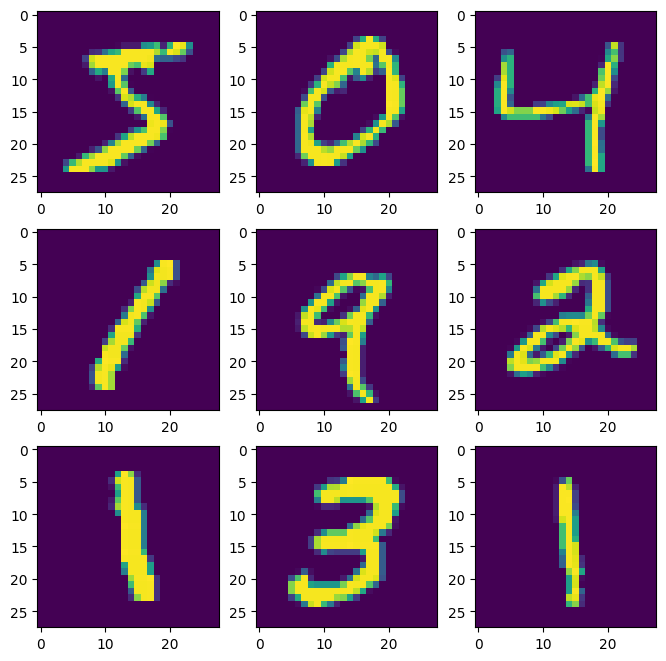

In [ ]:
((trainX, trainY), (testX, testY)) = mnist.load_data()


# plot first few images
columns = 3
rows = 3

f, axs = plt.subplots(rows, columns, figsize=(8, 8))

for r in range(0, rows):
    for c in range(0, columns):
        axs[r, c].imshow(trainX[(columns * r) + c])

plt.show()

In [ ]:
# Load the MNIST Dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

num_classes = 10

# Normalize pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten the images to a 1D array (for MNIST)
x_train = x_train.reshape((-1, 28*28))
x_test = x_test.reshape((-1, 28*28))

# Convert labels to one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
model = Sequential()
model.add(Dense(512, input_shape=(28*28,), activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
sgd = SGD(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=128, epochs=11, validation_data=(x_test, y_test))

Epoch 1/11
469/469 [==============================] - 9s 18ms/step - loss: 1.0817 - accuracy: 0.7513 - val_loss: 0.5210 - val_accuracy: 0.8723
Epoch 2/11
469/469 [==============================] - 6s 12ms/step - loss: 0.4493 - accuracy: 0.8834 - val_loss: 0.3679 - val_accuracy: 0.9018
Epoch 3/11
469/469 [==============================] - 7s 16ms/step - loss: 0.3592 - accuracy: 0.9018 - val_loss: 0.3176 - val_accuracy: 0.9109
Epoch 4/11
469/469 [==============================] - 6s 13ms/step - loss: 0.3182 - accuracy: 0.9113 - val_loss: 0.2896 - val_accuracy: 0.9197
Epoch 5/11
469/469 [==============================] - 6s 14ms/step - loss: 0.2918 - accuracy: 0.9182 - val_loss: 0.2692 - val_accuracy: 0.9248
Epoch 6/11
469/469 [==============================] - 7s 15ms/step - loss: 0.2723 - accuracy: 0.9229 - val_loss: 0.2560 - val_accuracy: 0.9297
Epoch 7/11
469/469 [==============================] - 6s 13ms/step - loss: 0.2565 - accuracy: 0.9279 - val_loss: 0.2408 - val_accuracy: 0.9315

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.20277707278728485
Test accuracy: 0.9412999749183655


313/313 [==============================] - 3s 9ms/step
Actual Number:  9
Predicted Number:  9


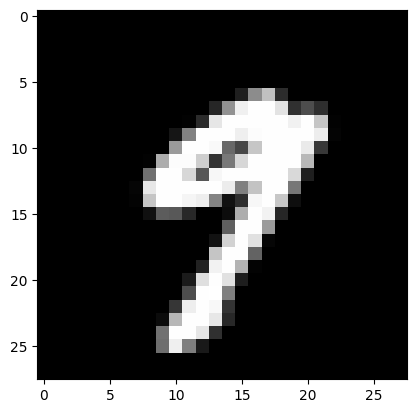

In [ ]:
n = 20
plt.imshow(x_test[n].reshape(28, 28), cmap='gray')
predicted_value = model.predict(x_test)
print("Actual Number: ",np.argmax(y_test[n]))
print("Predicted Number: ", np.argmax(predicted_value[n]))

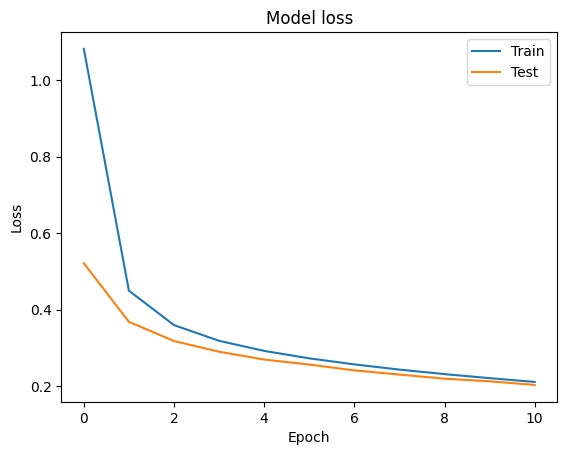

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

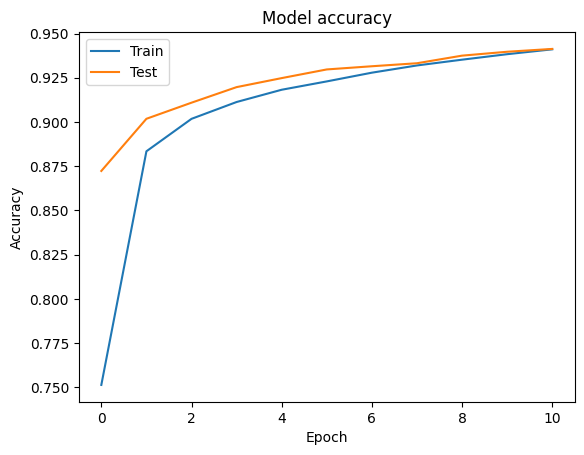

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()